#### Dependências

In [120]:
# Gráficos
import matplotlib.pyplot as plt

# Matemática + manipualação de vetores
import math
import numpy as np

# "Fixar" números aleatórios a serem gerados
np.random.seed(0)

# Trabalhar com os dados
import pandas as pd
from sklearn.datasets.mldata import fetch_mldata

# Utilidades
import utils

# Recarregar automaticamente dependências caso elas mudem
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# PCA (Principal Component Analysis)

PCA é uma técnica estatística bastante utilizada em Data Science e Machine Learning. 

Em Machine Learning, PCA é uma técnica de extração de features. A ideia é que temos muitas dimensões para trabalhar com os dados, e podemos eventualmente querer trabalhar com menos features porém queremos manter o máximo de informações possíveis em relação ao dado original.

Desse modo PCA pode ser utilizado para: reduzir dimensionalidade dos dados, visualizar dados em um espaço 2D ou 3D, diminuir correlação entre as features.

Quando trabalhamos com dados no contexto de Machine Learning, o que temos são vetores ou mais espeficamente tensores, com uma certa dimensão e propriedades. Por exemplo, digamos que estamos trabalhando com dados de duas dimensões: x e y, onde y = 2x + 10.

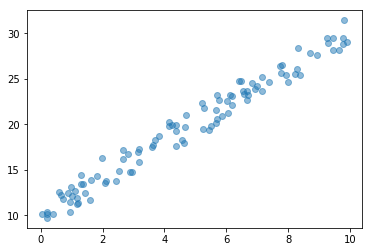

In [121]:
data = utils.generate_linear_relation(2, 10)
x, y = data[:, 0], data[:, 1]
utils.plot(x, y)
plt.show()

Se x e y são dimensões dos nossos podemos ver que estes apresentam correlação entre si, e podemos de fato calcular essa correlação:

In [122]:
np.corrcoef(x, y)[0][1]

0.9853103832101712

Correlação é uma característica não desejada entre diferentes features já que claramente uma delas não está nos dando nenhuma nova informação, e portanto não deveríamos utilizá-la. Uma forma manual de lidar com essa questão é simplesmente remover uma das features. Dessa forma obteríamos ou apenas o eixo X ou apenas o eixo Y.

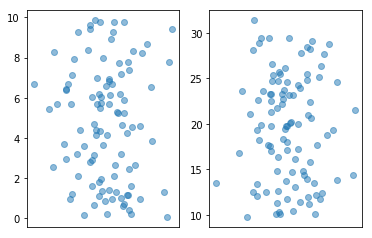

In [123]:
plt.subplot(1, 2, 1)
utils.plot(x)
plt.subplot(1, 2, 2)
utils.plot(y)

De outra forma, olhando os dados originais, y = 2x + 10, poderíamos obter o principal componente que irá indicar qual o vetor que contém mais informação em relação a esses dados. No sentido de achar o vetor que melhor representa esses dados.

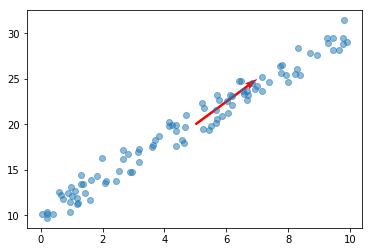

In [124]:
utils.plot(x, y)
utils.plot_vectors([([5, 20], [2, 5])])
plt.show()

## Carregando iris dataset

In [136]:
# load iris
iris = fetch_mldata('iris')
# np.c_ is the numpy concatenate function
# which is used to concat iris['data'] and iris['target'] arrays 
iris_data = pd.DataFrame(data=np.c_[iris['data'], iris['target']],
                         columns=['x0', 'x1', 'x2', 'x3', 'target'])

In [189]:
X = iris_data.values[:,:-1]

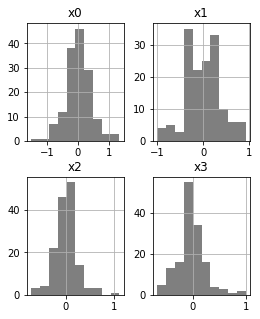

In [190]:
iris_data.drop(['target'], axis=1).diff().hist(color='k', alpha=0.5, bins=10, figsize=(4, 5))
plt.show()

### PCA

In [191]:
def pca(X, components=3, center_data=True):
    def _center_data(X):
        X = X.copy()
        X -= np.mean(X, axis = 0)
        return X
    
    if center_data:
        X = _center_data(X)

    eigvals, eigvecs = np.linalg.eig(np.dot(X.T, X))
    
    indx_sort = np.argsort(eigvals)[::-1]
    
    eigvals = eigvals[indx_sort]
    eigvecs = eigvecs[indx_sort]
    
    return eigvecs.T[:components].dot(X.T)

In [192]:
X_new = pca(X)

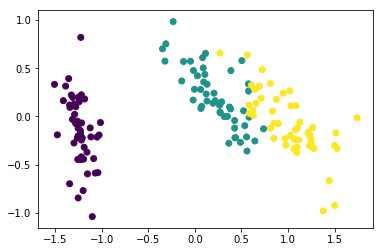

In [193]:
colors = [int(i % 23) for i in iris_data.values[:, -1]]
plt.scatter(X_new[0], X_new[1], c=np.array(colors))
plt.show()

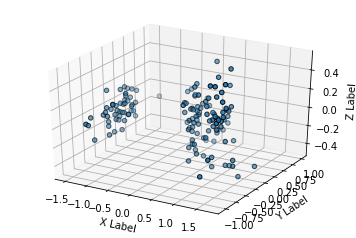

In [194]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
for c, m in [('r', 'o')]:
    ax.scatter(X_new[0], X_new[1], X_new[2], cmap=plt.cm.nipy_spectral, edgecolor='k')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

### Carregando fashion MNIST

In [220]:
mnist = fetch_mldata('MNIST original')

mnist.data = mnist.data / 255.
X = mnist.data.astype(float)

In [221]:
X_new = pca(X)

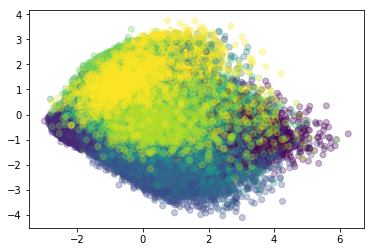

In [227]:
colors = [i + 15 for i in mnist.target]
plt.scatter(X_new[0], X_new[1], c=np.array(colors), alpha=0.3)
plt.show()

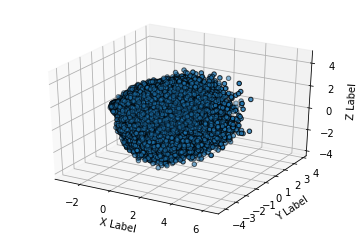

In [228]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
for c, m in [('r', 'o')]:
    ax.scatter(X_new[0], X_new[1], X_new[2], cmap=plt.cm.nipy_spectral, edgecolor='k')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()